# import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dropout,Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read & load the dataset
df=pd.read_csv("/content/drive/MyDrive/GP-Ai/table-a-13-2-daily-card-payments-data.xlsx - Data (1).csv")
df.head()

Date Spending on All Cards o/w In-Store Spending (card present)  \
0  3/1/2020               161,585                                    .   
1  3/2/2020               200,531                                    .   
2  3/3/2020               206,116                                    .   
3  3/4/2020               198,839                                    .   
4  3/5/2020               236,225                                    .   

  o/w In-Store Spending (card present).1 All Debit Cards o/w ATM withdrawals  \
0                                      .         139,676              33,773   
1                                      .         168,407              40,681   
2                                      .         174,502              47,888   
3                                      .         168,387              46,273   
4                                      .         205,385              67,610   

  o/w Point of Sale All Credit Cards Groceries/ Perishables Other Retail  \
0           105,903           21,909                      .            .   
1           127,726           32,124                      .            .   
2           126,614           31,614                      .            .   
3           122,114           30,452                      .            .   
4           137,775           30,840                      .            .   

  Transport Accommodation Restaurants/ Dining Other  
0         .             .                   .     .  
1         .             .                   .     .  
2         .             .                   .     .  
3         .             .                   .     .  
4         .             .                   .     .

# Data Cleaning

In [ ]:
df.tail()

Date Spending on All Cards o/w In-Store Spending (card present)  \
909  8/27/2022               308,026                              104,315   
910  8/28/2022               224,695                               72,789   
911  8/29/2022               233,641                               99,232   
912  8/30/2022               269,136                              123,248   
913  8/31/2022               273,375                              132,633   

    o/w In-Store Spending (card present).1 All Debit Cards  \
909                                154,244         274,001   
910                                120,963         198,258   
911                                106,746         201,288   
912                                113,039         231,573   
913                                105,280         234,377   

    o/w ATM withdrawals o/w Point of Sale All Credit Cards  \
909              49,467           224,534           34,025   
910              30,943           167,315           26,438   
911              27,663           173,625           32,353   
912              32,849           198,724           37,562   
913              35,462           198,915           38,999   

    Groceries/ Perishables Other Retail Transport Accommodation  \
909                 51,932       70,360    13,216        11,681   
910                 42,427       52,601    10,406        10,566   
911                 37,867       56,384    13,113         9,089   
912                 38,389       67,363    15,672         8,116   
913                 39,585       68,497    15,852         8,009   

    Restaurants/ Dining   Other  
909              26,027  85,342  
910              23,384  54,369  
911              15,343  74,182  
912              11,512  95,236  
913              12,270  93,701

In [ ]:
df.shape

(914, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Date                                    914 non-null    object
 1   Spending on All Cards                   914 non-null    object
 2   o/w In-Store Spending (card present)    914 non-null    object
 3   o/w In-Store Spending (card present).1  914 non-null    object
 4   All Debit Cards                         914 non-null    object
 5   o/w ATM withdrawals                     914 non-null    object
 6   o/w Point of Sale                       914 non-null    object
 7   All Credit Cards                        914 non-null    object
 8   Groceries/ Perishables                  914 non-null    object
 9   Other Retail                            914 non-null    object
 10  Transport                               914 non-null    object
 11  Accomm

In [ ]:
df.nunique()

Date                                      914
Spending on All Cards                     911
o/w In-Store Spending (card present)      696
o/w In-Store Spending (card present).1    700
All Debit Cards                           913
o/w ATM withdrawals                       902
o/w Point of Sale                         911
All Credit Cards                          901
Groceries/ Perishables                    691
Other Retail                              698
Transport                                 682
Accommodation                             679
Restaurants/ Dining                       689
Other                                     700
dtype: int64

In [ ]:
# change "Date" column type to DateTime
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df.head()

Date Spending on All Cards o/w In-Store Spending (card present)  \
0 2020-03-01               161,585                                    .   
1 2020-03-02               200,531                                    .   
2 2020-03-03               206,116                                    .   
3 2020-03-04               198,839                                    .   
4 2020-03-05               236,225                                    .   

  o/w In-Store Spending (card present).1 All Debit Cards o/w ATM withdrawals  \
0                                      .         139,676              33,773   
1                                      .         168,407              40,681   
2                                      .         174,502              47,888   
3                                      .         168,387              46,273   
4                                      .         205,385              67,610   

  o/w Point of Sale All Credit Cards Groceries/ Perishables Other Retail  \
0           105,903           21,909                      .            .   
1           127,726           32,124                      .            .   
2           126,614           31,614                      .            .   
3           122,114           30,452                      .            .   
4           137,775           30,840                      .            .   

  Transport Accommodation Restaurants/ Dining Other  
0         .             .                   .     .  
1         .             .                   .     .  
2         .             .                   .     .  
3         .             .                   .     .  
4         .             .                   .     .

## Check null values

In [ ]:
#check for null data
df.isnull().sum()

Date                                      0
Spending on All Cards                     0
o/w In-Store Spending (card present)      0
o/w In-Store Spending (card present).1    0
All Debit Cards                           0
o/w ATM withdrawals                       0
o/w Point of Sale                         0
All Credit Cards                          0
Groceries/ Perishables                    0
Other Retail                              0
Transport                                 0
Accommodation                             0
Restaurants/ Dining                       0
Other                                     0
dtype: int64

it shows that their is no null data but it is obvise in the data set that their is some cells fieled with  NaN

In [ ]:
#check if data contains any zeros
is_filled_with_zero = df.equals(pd.DataFrame(0, index=df.index, columns=df.columns))
print("Is the data filled with 0?", is_filled_with_zero)

Is the data filled with 0? False


In [ ]:
# Iterate over each column except Date
for column in df.drop('Date', axis=1).columns:
    # Check if the column contains data with comma seperator
    if df[column].dtype == object:
        df[column] = df[column].str.replace(',', '.')
df.head()

Date Spending on All Cards o/w In-Store Spending (card present)  \
0 2020-03-01               161.585                                    .   
1 2020-03-02               200.531                                    .   
2 2020-03-03               206.116                                    .   
3 2020-03-04               198.839                                    .   
4 2020-03-05               236.225                                    .   

  o/w In-Store Spending (card present).1 All Debit Cards o/w ATM withdrawals  \
0                                      .         139.676              33.773   
1                                      .         168.407              40.681   
2                                      .         174.502              47.888   
3                                      .         168.387              46.273   
4                                      .         205.385              67.610   

  o/w Point of Sale All Credit Cards Groceries/ Perishables Other Retail  \
0           105.903           21.909                      .            .   
1           127.726           32.124                      .            .   
2           126.614           31.614                      .            .   
3           122.114           30.452                      .            .   
4           137.775           30.840                      .            .   

  Transport Accommodation Restaurants/ Dining Other  
0         .             .                   .     .  
1         .             .                   .     .  
2         .             .                   .     .  
3         .             .                   .     .  
4         .             .                   .     .

In [ ]:
# Drop the Date column
data = df.drop(['Date'], axis=1)

# Convert all object data to float
data = data.apply(pd.to_numeric, errors='coerce')
data.head()

Spending on All Cards  o/w In-Store Spending (card present)  \
0                161.585                                   NaN   
1                200.531                                   NaN   
2                206.116                                   NaN   
3                198.839                                   NaN   
4                236.225                                   NaN   

   o/w In-Store Spending (card present).1  All Debit Cards  \
0                                     NaN          139.676   
1                                     NaN          168.407   
2                                     NaN          174.502   
3                                     NaN          168.387   
4                                     NaN          205.385   

   o/w ATM withdrawals  o/w Point of Sale  All Credit Cards  \
0               33.773            105.903            21.909   
1               40.681            127.726            32.124   
2               47.888            126.614            31.614   
3               46.273            122.114            30.452   
4               67.610            137.775            30.840   

   Groceries/ Perishables  Other Retail  Transport  Accommodation  \
0                     NaN           NaN        NaN            NaN   
1                     NaN           NaN        NaN            NaN   
2                     NaN           NaN        NaN            NaN   
3                     NaN           NaN        NaN            NaN   
4                     NaN           NaN        NaN            NaN   

   Restaurants/ Dining  Other  
0                  NaN    NaN  
1                  NaN    NaN  
2                  NaN    NaN  
3                  NaN    NaN  
4                  NaN    NaN

In [ ]:
# Insert the Date column at the beginning
data.insert(loc=0, column='Date', value=df['Date'])
data.tail()

Date  Spending on All Cards  o/w In-Store Spending (card present)  \
909 2022-08-27                308.026                               104.315   
910 2022-08-28                224.695                                72.789   
911 2022-08-29                233.641                                99.232   
912 2022-08-30                269.136                               123.248   
913 2022-08-31                273.375                               132.633   

     o/w In-Store Spending (card present).1  All Debit Cards  \
909                                 154.244          274.001   
910                                 120.963          198.258   
911                                 106.746          201.288   
912                                 113.039          231.573   
913                                 105.280          234.377   

     o/w ATM withdrawals  o/w Point of Sale  All Credit Cards  \
909               49.467            224.534            34.025   
910               30.943            167.315            26.438   
911               27.663            173.625            32.353   
912               32.849            198.724            37.562   
913               35.462            198.915            38.999   

     Groceries/ Perishables  Other Retail  Transport  Accommodation  \
909                  51.932        70.360     13.216         11.681   
910                  42.427        52.601     10.406         10.566   
911                  37.867        56.384     13.113          9.089   
912                  38.389        67.363     15.672          8.116   
913                  39.585        68.497     15.852          8.009   

     Restaurants/ Dining   Other  
909               26.027  85.342  
910               23.384  54.369  
911               15.343  74.182  
912               11.512  95.236  
913               12.270  93.701

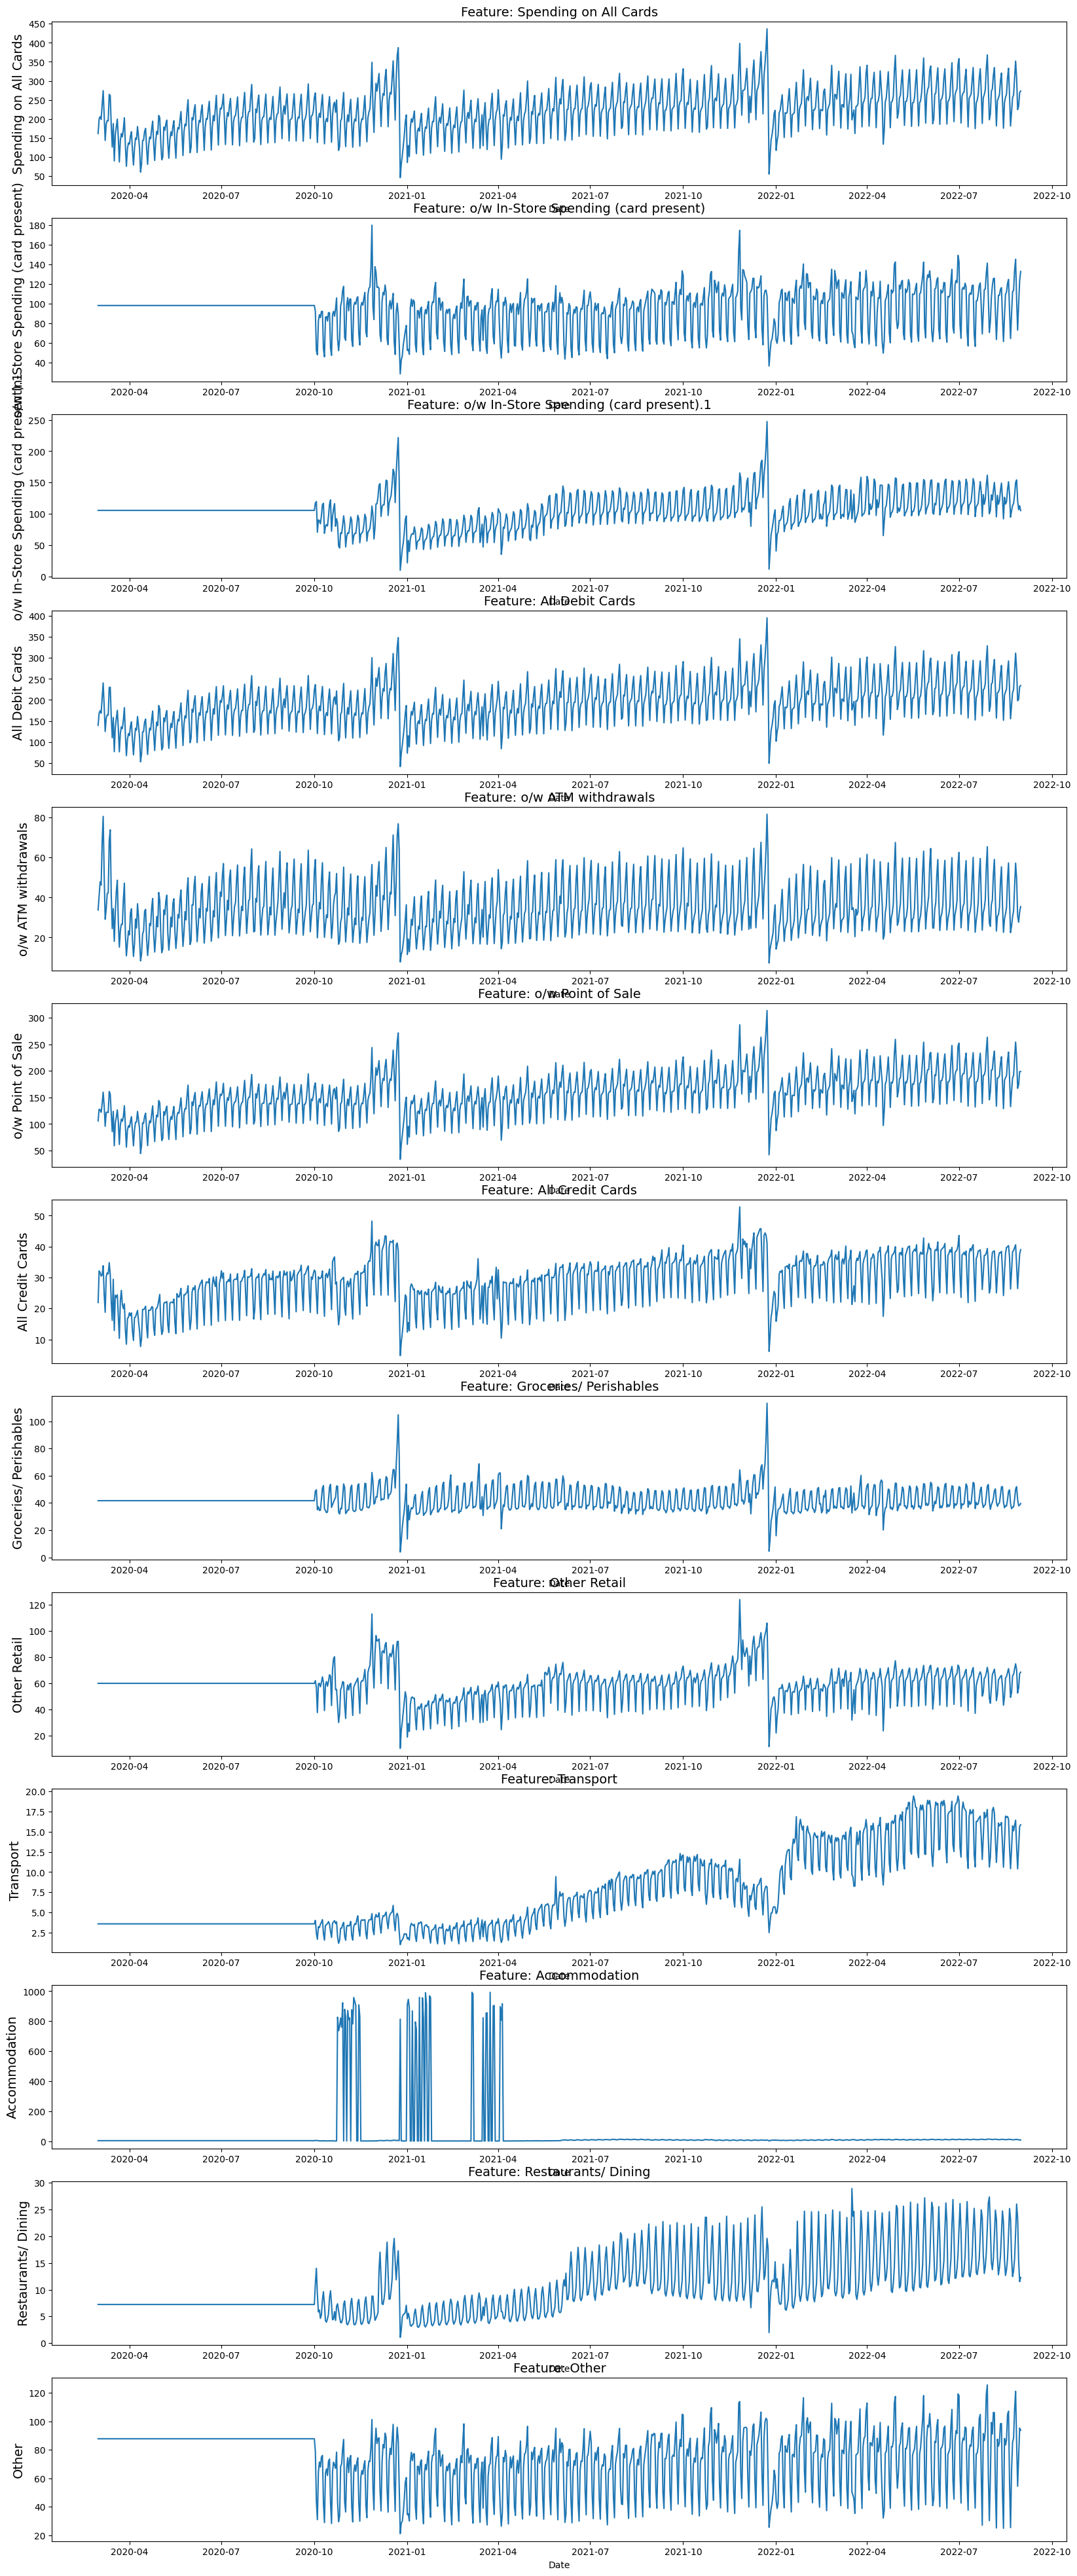

In [ ]:
# we will use bfill to fill this null values
f, ax = plt.subplots(nrows=13, ncols=1, figsize=(20, 50))

for i in range(len(data.drop('Date', axis=1).columns)):
    column = data.drop('Date', axis=1).columns[i]
    sns.lineplot(x=data['Date'], y=data[column].fillna(method='bfill'), ax=ax[i])
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

In [ ]:
#check if data is correctly formated
# Sort the DataFrame by the 'Date' column
data = data.sort_values(by='Date')
# Calculate time intervals between consecutive dates
data['delta'] = data['Date'] - data['Date'].shift(1)
# Display the first few rows
data[['Date', 'delta']].head()

Date  delta
0 2020-03-01    NaT
1 2020-03-02 1 days
2 2020-03-03 1 days
3 2020-03-04 1 days
4 2020-03-05 1 days

In [ ]:
# Calculate the sum of all time intervals and the total number of intervals
data['delta'].sum(), data['delta'].count()

(Timedelta('913 days 00:00:00'), 913)

The time interval is one day and the data is already in chronological order

In [ ]:
# Drop the 'delta' column as it was created for analysis purposes
data = data.drop('delta', axis=1)

# Check for missing values in the DataFrame after data manipulation
data.isnull().sum()


Date                                        0
Spending on All Cards                       0
o/w In-Store Spending (card present)      214
o/w In-Store Spending (card present).1    214
All Debit Cards                             0
o/w ATM withdrawals                         0
o/w Point of Sale                           0
All Credit Cards                            0
Groceries/ Perishables                    214
Other Retail                              214
Transport                                 214
Accommodation                             214
Restaurants/ Dining                       214
Other                                     214
dtype: int64

In [ ]:
data.head()

Date  Spending on All Cards  o/w In-Store Spending (card present)  \
0 2020-03-01                161.585                                   NaN   
1 2020-03-02                200.531                                   NaN   
2 2020-03-03                206.116                                   NaN   
3 2020-03-04                198.839                                   NaN   
4 2020-03-05                236.225                                   NaN   

   o/w In-Store Spending (card present).1  All Debit Cards  \
0                                     NaN          139.676   
1                                     NaN          168.407   
2                                     NaN          174.502   
3                                     NaN          168.387   
4                                     NaN          205.385   

   o/w ATM withdrawals  o/w Point of Sale  All Credit Cards  \
0               33.773            105.903            21.909   
1               40.681            127.726            32.124   
2               47.888            126.614            31.614   
3               46.273            122.114            30.452   
4               67.610            137.775            30.840   

   Groceries/ Perishables  Other Retail  Transport  Accommodation  \
0                     NaN           NaN        NaN            NaN   
1                     NaN           NaN        NaN            NaN   
2                     NaN           NaN        NaN            NaN   
3                     NaN           NaN        NaN            NaN   
4                     NaN           NaN        NaN            NaN   

   Restaurants/ Dining  Other  
0                  NaN    NaN  
1                  NaN    NaN  
2                  NaN    NaN  
3                  NaN    NaN  
4                  NaN    NaN

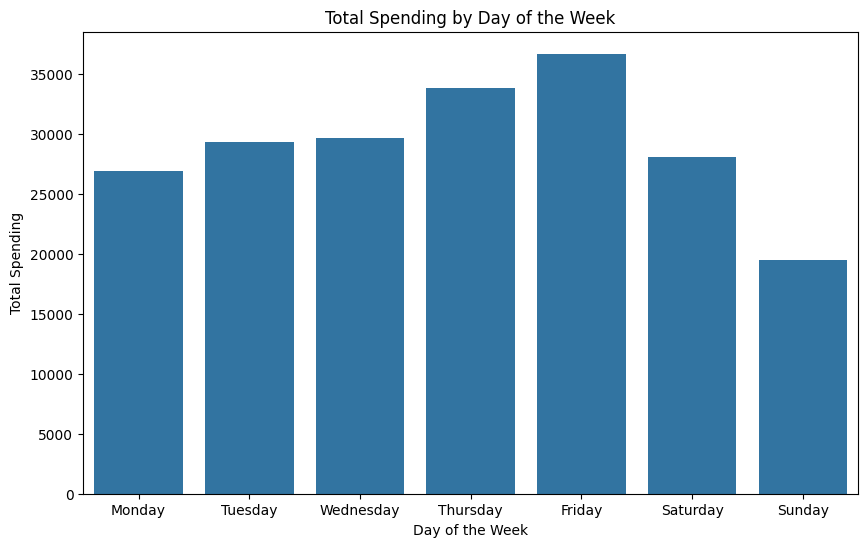

In [ ]:
# Aggregate spending data by day of the week
data['Day_of_Week'] = data['Date'].dt.dayofweek
spending_by_day = data.groupby('Day_of_Week')['Spending on All Cards'].sum()

# Plot the total spending for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=spending_by_day.index, y=spending_by_day.values)
plt.title('Total Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Spending')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


# Data Splitting

In [ ]:
# split the data set
train_size = int(0.85* len(data))
test_size = len(data) - train_size

# Create a subset containing only the 'Date' and 'Spending on All Cards' columns
univariate_data = data[['Date', 'Spending on All Cards']].copy()
# Rename columns for convention used in time series analysis
univariate_data.columns = ['ds', 'y']
# Split the data into training and validation sets
train = univariate_data.iloc[:train_size, :]
# Separate 'Date' and 'Spending on All Cards' into feature and target variables for training set
x_train, y_train = pd.DataFrame(univariate_data.iloc[:train_size, 0]), pd.DataFrame(univariate_data.iloc[:train_size, 1])
# Separate 'Date' and 'Spending on All Cards' into feature and target variables for validation set
x_valid, y_valid = pd.DataFrame(univariate_data.iloc[train_size:, 0]), pd.DataFrame(univariate_data.iloc[train_size:, 1])

print(len(train), len(x_valid))

776 138


In [ ]:
# Scale the data
# Select the target variable 'y' for scaling
data = univariate_data.filter(['y'])
# Convert the dataframe to a numpy array
dataset = data.values
# Initialize MinMaxScaler with the desired feature range
scaler = MinMaxScaler(feature_range=(-1, 0))
# Fit and transform the dataset to scale the data
scaled_data = scaler.fit_transform(dataset)
# Display the first 10 scaled data points for inspection
scaled_data[:10]

array([[-0.70411256],
       [-0.60440646],
       [-0.59010824],
       [-0.60873817],
       [-0.51302585],
       [-0.41541136],
       [-0.58069215],
       [-0.75011008],
       [-0.64057572],
       [-0.61646459]])

In [ ]:
# Defines the rolling window
look_back = 30
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]
# Create Dataset Function
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

# LSTM Model

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)


# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data=(x_test, y_test), verbose=1, callbacks=[early_stopping, reduce_lr])

model.summary()

Epoch 1/15
23/23 [==============================] - 12s 63ms/step - loss: 0.0927 - val_loss: 0.0226 - lr: 0.0100
Epoch 2/15
23/23 [==============================] - 0s 11ms/step - loss: 0.0212 - val_loss: 0.0326 - lr: 0.0100
Epoch 3/15
23/23 [==============================] - 0s 11ms/step - loss: 0.0183 - val_loss: 0.0177 - lr: 0.0100
Epoch 4/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.0050 - lr: 0.0100
Epoch 5/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0083 - val_loss: 0.0045 - lr: 0.0100
Epoch 6/15
23/23 [==============================] - 0s 11ms/step - loss: 0.0066 - val_loss: 0.0055 - lr: 0.0100
Epoch 7/15
23/23 [==============================] - 0s 10ms/step - loss: 0.0080 - val_loss: 0.0118 - lr: 0.0100
Epoch 8/15
23/23 [==============================] - 0s 10ms/step - loss: 0.0073 - val_loss: 0.0044 - lr: 0.0100
Epoch 9/15
23/23 [==============================] - 0s 9ms/step - loss: 0.0058 - val_loss: 0.0022 - lr: 0

In [ ]:
y_test = np.transpose(y_test)

# Evaluation

In [ ]:
# Evaluate the model on the test data
loss= model.evaluate(x_test, y_test)

print(f'Test Loss: {loss}')
# Print train loss and validation loss separately
print("Train Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

5/5 [==============================] - 0s 7ms/step - loss: 0.0017
Test Loss: 0.0017149000195786357
Train Loss: [0.09273380041122437, 0.02119341865181923, 0.018339691683650017, 0.012964284978806973, 0.008313197642564774, 0.006556560751050711, 0.008008565753698349, 0.007344127167016268, 0.005753105506300926, 0.00597933167591691, 0.005219575483351946, 0.005032558459788561, 0.006300601176917553, 0.005073118954896927]
Validation Loss: [0.02263554185628891, 0.032554153352975845, 0.01766049861907959, 0.004960382357239723, 0.0044745951890945435, 0.005491954740136862, 0.011818885803222656, 0.004362475126981735, 0.0022374549880623817, 0.004085483029484749, 0.0017149000195786357, 0.0018980064196512103, 0.0033308439888060093, 0.0018634407315403223]


In [ ]:
# Make predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)


# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


# Get the root mean squared error (RMSE) and MAE
rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
mae = mean_absolute_error(y_test[0], test_predict[:,0])
mse = mean_squared_error(y_test[0], test_predict[:,0])
mape = np.mean(np.abs((y_test[0] - test_predict[:,0]) / y_test[0])) * 100
mpe = np.mean((y_test[0] - test_predict[:,0]) / y_test[0])

# Print the results
print(f'RMSE: {rmse}')
print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'MAPE:{mape}')
print(f'MPE:{mpe}')


5/5 [==============================] - 0s 7ms/step
RMSE: 16.17560474736001
MAE:11.753470131694408
MSE:261.6501889428156
MAPE:4.698615928627181
MPE:0.007514735456296297


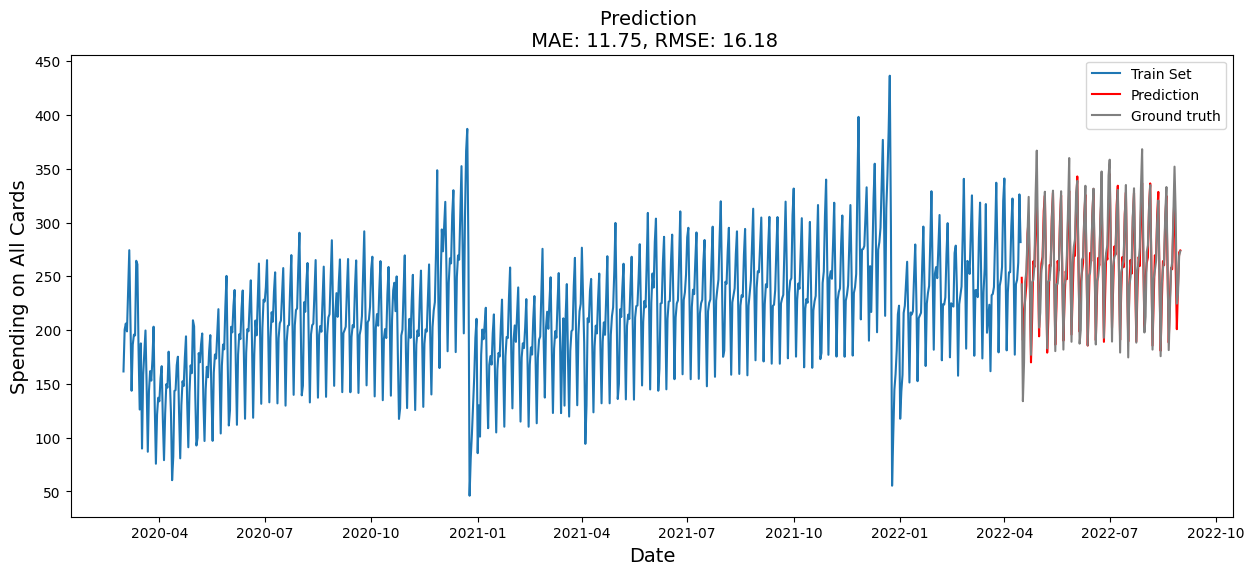

In [ ]:
x_train_ticks = univariate_data.head(train_size)['ds']
y_train = univariate_data.head(train_size)['y']
x_test_ticks = univariate_data.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set')
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='red', label='Prediction')
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='gray', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {mae:.2f}, RMSE: {rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Spending on All Cards', fontsize=14)

plt.show()


In [ ]:
df = pd.DataFrame({
    'Date': x_test_ticks,
    'Actual': y_test.flatten(),
    'Predicted': test_predict.flatten()
})

# Display the DataFrame
df.head()

<bound method NDFrame.head of           Date   Actual   Predicted
776 2022-04-16  242.537  248.669632
777 2022-04-17  133.926  190.642334
778 2022-04-18  169.787  215.761154
779 2022-04-19  245.037  229.146652
780 2022-04-20  254.488  241.515991
..         ...      ...         ...
909 2022-08-27  308.026  257.530212
910 2022-08-28  224.695  200.893433
911 2022-08-29  233.641  241.023270
912 2022-08-30  269.136  272.337799
913 2022-08-31  273.375  274.119843

[138 rows x 3 columns]>


## TimeSeries Plots

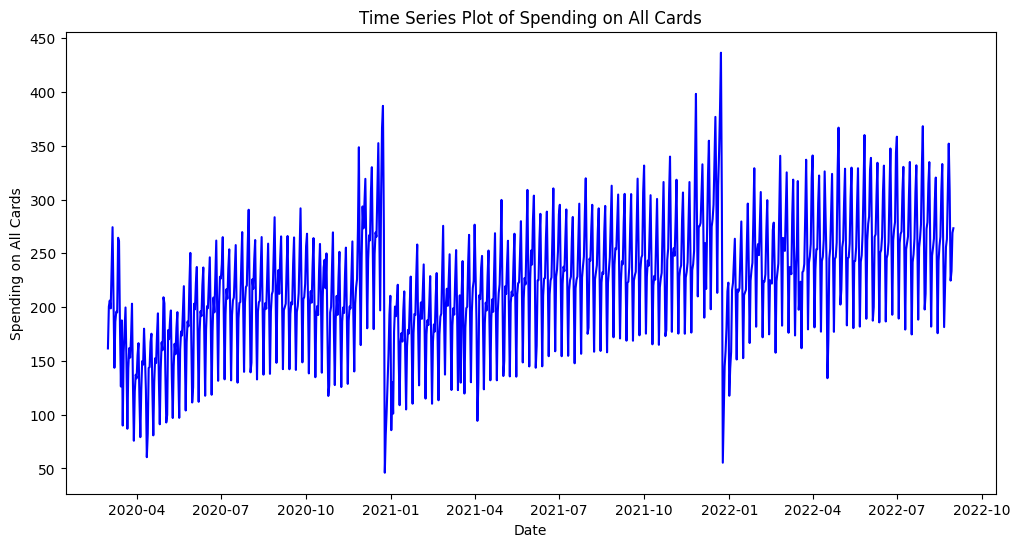

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(univariate_data['ds'], univariate_data['y'], color='blue')
plt.title('Time Series Plot of Spending on All Cards')
plt.xlabel('Date')
plt.ylabel('Spending on All Cards')
plt.show()

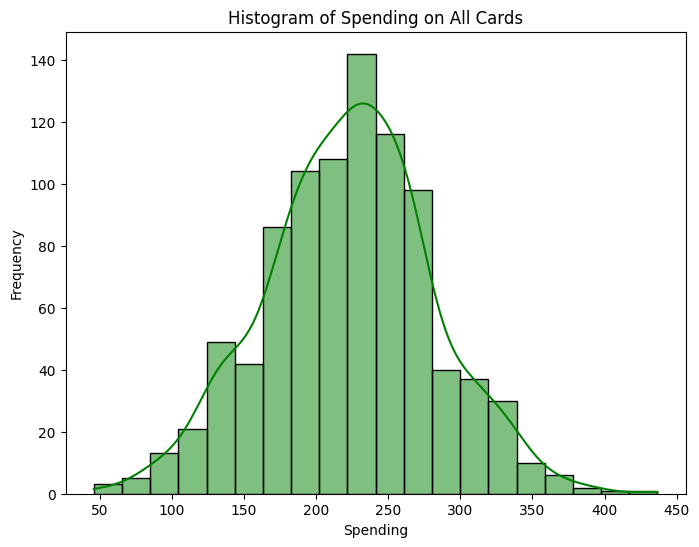

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(univariate_data['y'], bins=20, kde=True, color='green')
plt.title('Histogram of Spending on All Cards')
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x800 with 0 Axes>

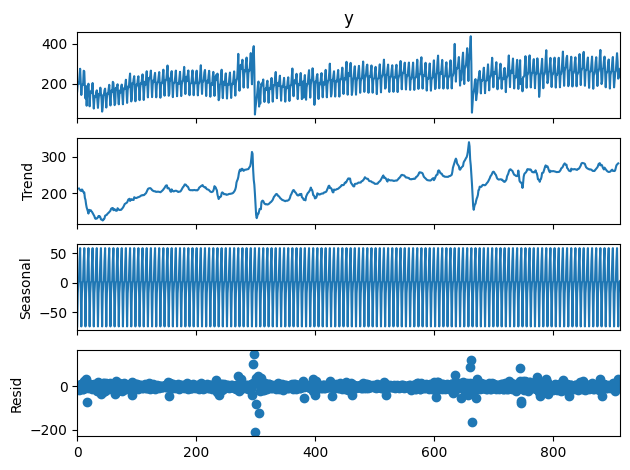

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(univariate_data['y'], model='additive', period=7)  # Assuming weekly seasonality
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


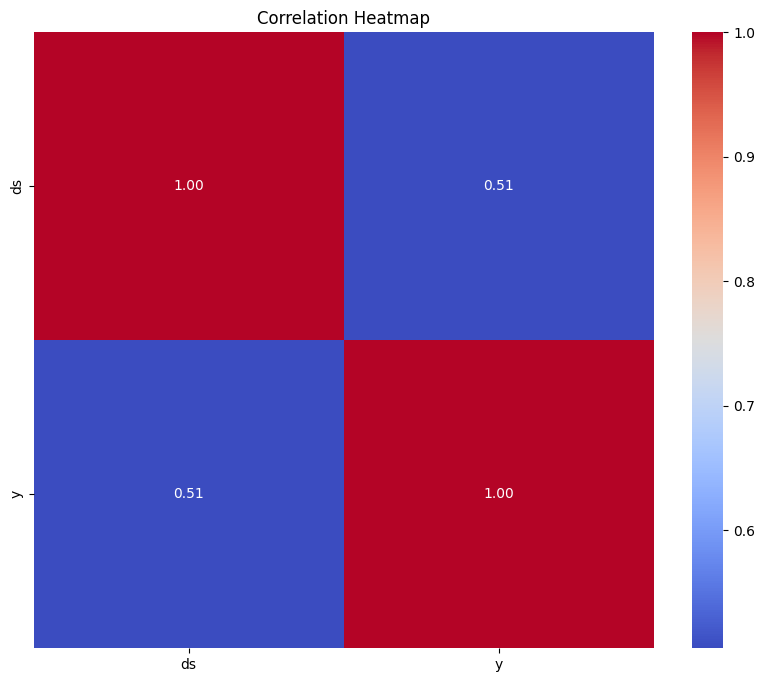

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(univariate_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


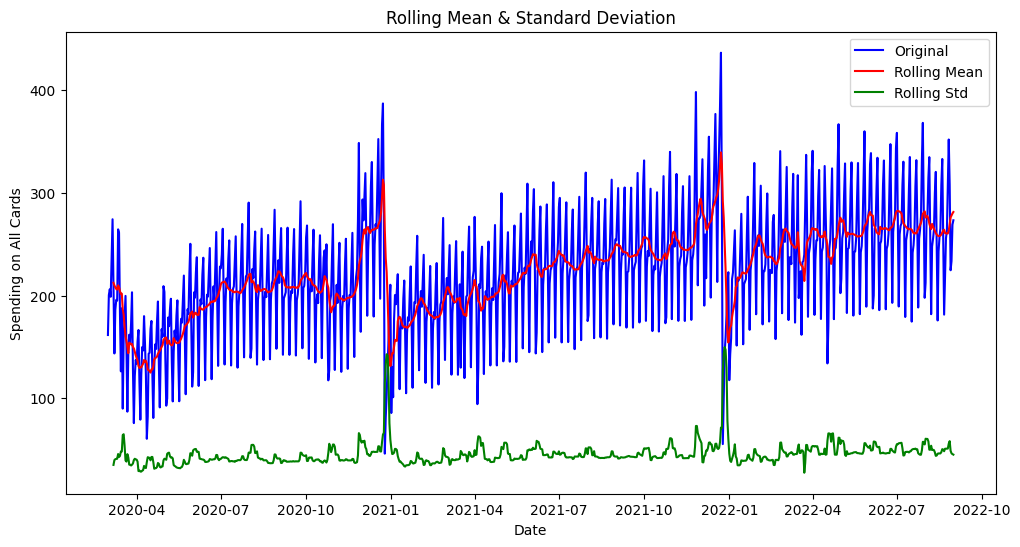

In [ ]:
roll_mean = univariate_data['y'].rolling(window=7).mean()  # Assuming weekly rolling mean
roll_std = univariate_data['y'].rolling(window=7).std()    # Assuming weekly rolling std
plt.figure(figsize=(12, 6))
plt.plot(univariate_data['ds'], univariate_data['y'], color='blue', label='Original')
plt.plot(univariate_data['ds'], roll_mean, color='red', label='Rolling Mean')
plt.plot(univariate_data['ds'], roll_std, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Spending on All Cards')
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import seasonal_plot

def seasonal_subseries_plot(data, period):
    n_seasons = len(data) // period
    remainder = len(data) % period

    if remainder != 0:
        n_seasons += 1

    fig, axes = plt.subplots(n_seasons, 1, figsize=(12, n_seasons * 4))

    for i, ax in enumerate(axes):
        season_data = data[i * period:(i + 1) * period]
        ax.plot(range(1, len(season_data) + 1), season_data)
        ax.set_title(f'Season {i + 1}')
        ax.set_xlabel('Day of the Season')
        ax.set_ylabel('Spending on All Cards')

    plt.tight_layout()
    plt.show()

# Call the function to create the seasonal subseries plot
seasonal_subseries_plot(univariate_data['y'], period=7)  # Assuming weekly seasonality



In [ ]:
'''from keras.models import load_model

# Specify the file path where you want to save the model
model_file_path = "lstm_model.h5"

# Save the model
model.save(model_file_path)

print("Model saved successfully.")'''


'from keras.models import load_model\n\n# Specify the file path where you want to save the model\nmodel_file_path = "lstm_model.h5"\n\n# Save the model\nmodel.save(model_file_path)\n\nprint("Model saved successfully.")'